# Utilizando K-means com a base da iris

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from K_means_class import KMeans as km
import K_means as KmeansGPT
from sklearn import datasets

In [9]:
iris = datasets.load_iris()
K = 3

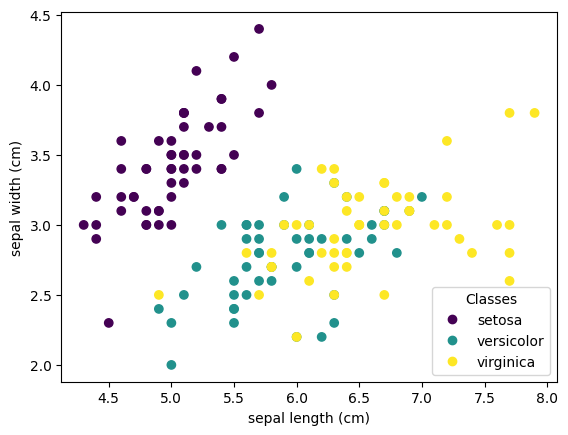

In [6]:
#Plot de como estão os dados da iris

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [7]:
x = iris.data

## Iniciando o K-means normal

In [10]:
modelX = km(max_iter = 200, tolerance = 0.5, clusters = K, run = 200,distance_metric='euclidean')
(clustersX, data_with_clustersX) = modelX.fit(x)

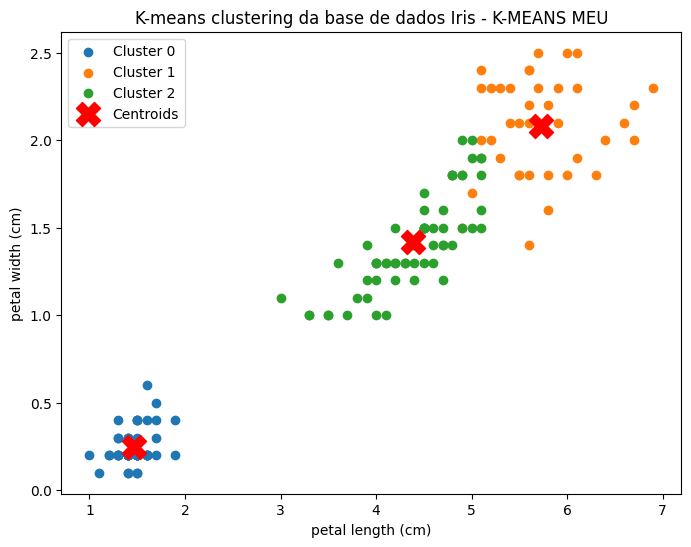

In [12]:
x_index = 2  # Comprimento da pétala
y_index = 3  # Largura da pétala

plt.figure(figsize=(8, 6))

xxx = np.unique(data_with_clustersX[:,4])

# Criar um scatter plot com as cores dos clusters
for cluster in range(len(xxx)):
    plt.scatter(x[data_with_clustersX[:,4] == cluster, x_index], 
                x[data_with_clustersX[:,4] == cluster, y_index], 
                label=f'Cluster {cluster}')

# Plotar os centroids
plt.scatter(clustersX[:, x_index], 
            clustersX[:, y_index], 
            s=300, c='red', marker='X', label='Centroids')

# Adicionar título e legendas
plt.title('K-means clustering da base de dados Iris - K-MEANS MEU')
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()

# Mostrar o gráfico
plt.show()

## Iniciando o K-means do Chat GPT

In [ ]:
xx = KmeansGPT.k_means(X,K,max_iter=200)
centroids, labels = xx

In [ ]:
x_index = 2  # Comprimento da pétala
y_index = 3  # Largura da pétala

plt.figure(figsize=(8, 6))

xxx = np.unique(data_with_clustersX[:,4])

# Criar um scatter plot com as cores dos clusters
for cluster in range(len(xxx)):
    plt.scatter(X[data_with_clustersX[:,4] == cluster, x_index], 
                X[data_with_clustersX[:,4] == cluster, y_index], 
                label=f'Cluster {cluster}')

# Plotar os centroids
plt.scatter(clustersX[:, x_index], 
            clustersX[:, y_index], 
            s=300, c='red', marker='X', label='Centroids')

# Adicionar título e legendas
plt.title('K-means clustering da base de dados Iris - K-MEANS MEU')
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()

# Mostrar o gráfico
plt.show()